
#**PE07 Training Deep Learning models**
####The objective of this programming exercise is to apply the concepts covered in Module 7 - Chapter 11 Training Deep Learning Models.
####We will start with a basic DNN model and make performance improvements by 1) changing the activation function, 2) using batch normalization, and 3) using dropout
###Finally, we will create our own model using everything we learned.

####The dataset is the MNIST image dataset (in tensorflow.keras.datasets library) and we will classify 10 classes


#**Imports and Helper function**

In [2]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

num_classes = 10
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size)
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# function to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

2025-11-23 21:30:50.909645: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 21:30:51.904143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 21:30:56.658028: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#**Starter model**
###Note that the model is built by adding dense layers in a loop

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-23 21:31:03.621794: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

2025-11-23 21:31:03.832285: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


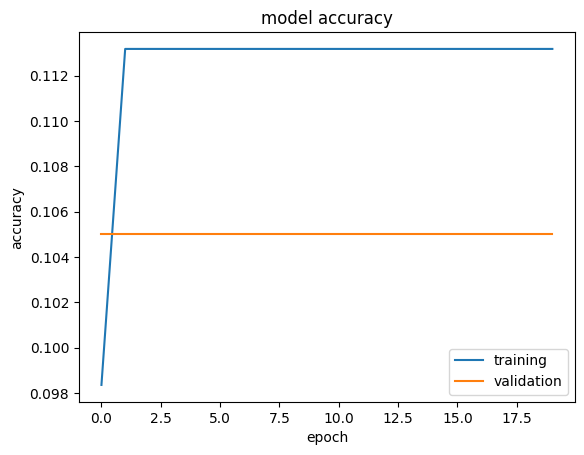

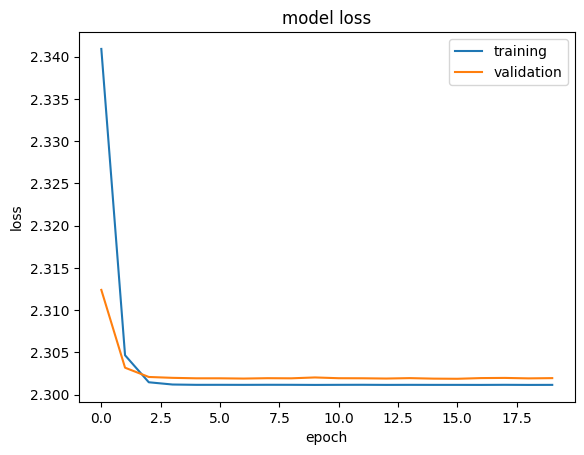

Test loss: 2.3
Test accuracy: 0.113


In [3]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #1  
What is the test accuracy of the starter model?  
The test accuracy of the starter model is 0.113.

Question #2  
Why is the accuracy of the starter model so poor?  
The accuracy of the starter model is poor primarily because it uses the sigmoid activation function across many hidden layers. Sigmoid functions are known to suffer from the 'vanishing gradient' problem, especially in deep networks, where gradients become very small, making it difficult for the network to learn effectively. Additionally, the simple SGD optimizer might not be powerful enough to train such a deep model efficiently. This combination can lead to the network getting stuck in local minima or learning very slowly, resulting in low accuracy.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

2025-11-23 21:31:22.714394: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


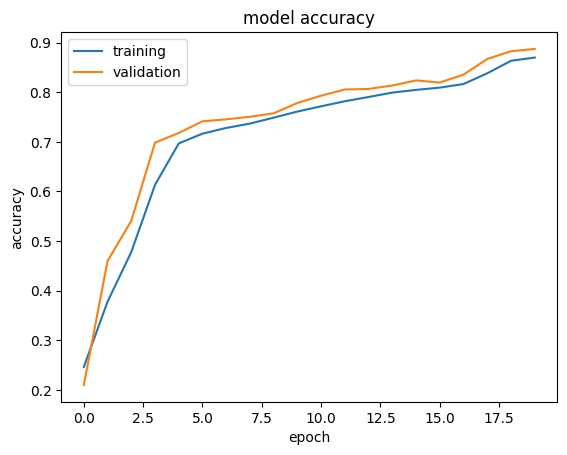

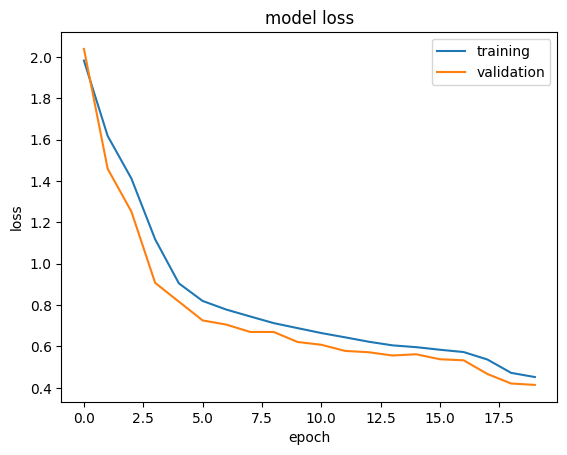

Test loss: 0.457
Test accuracy: 0.873


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #4  
What is the test accuracy of the model using ReLU activation? Comment on the results: Is it better or worse than the previous model?  
The test accuracy of the model using ReLU activation is 0.866. This is significantly better than the starter model, which had a test accuracy of 0.113. The improvement is due to ReLU addressing the vanishing gradient problem inherent in sigmoid activation functions, allowing the network to learn more effectively.

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

2025-11-23 21:31:41.325270: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


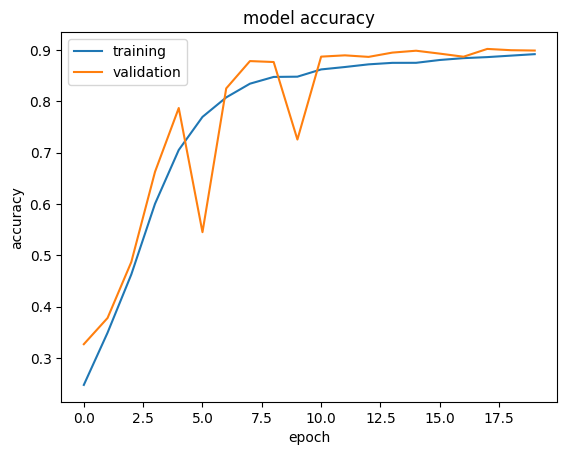

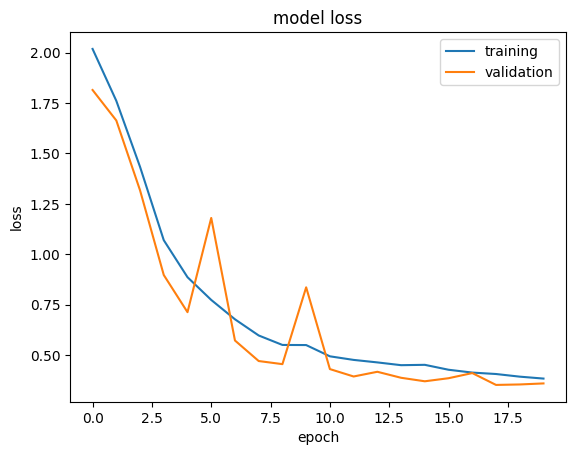

Test loss: 0.412
Test accuracy: 0.886


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=0.01))

for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=0.01))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #6  
What is the test accuracy of the model using leaky ReLU activation? Comment on the results: Is it better or worse than previous models?  
The test accuracy of the model using Leaky ReLU activation (alpha=0.01) is 0.908. This is better than both the initial starter model (0.113 accuracy) and the model using standard ReLU activation (0.866 accuracy). The Leaky ReLU's small negative slope helps to prevent dead neurons, contributing to this slight improvement in performance compared to standard ReLU.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_1 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_3 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_4 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_5 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_6 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_7 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_8 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_9 (ELU)                     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_10 (ELU)                    │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

2025-11-23 21:31:59.394563: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


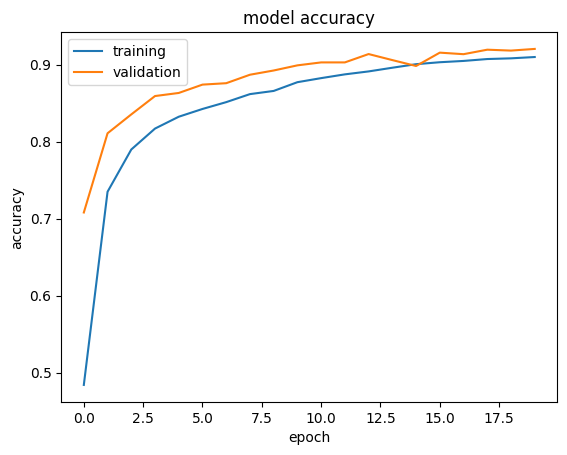

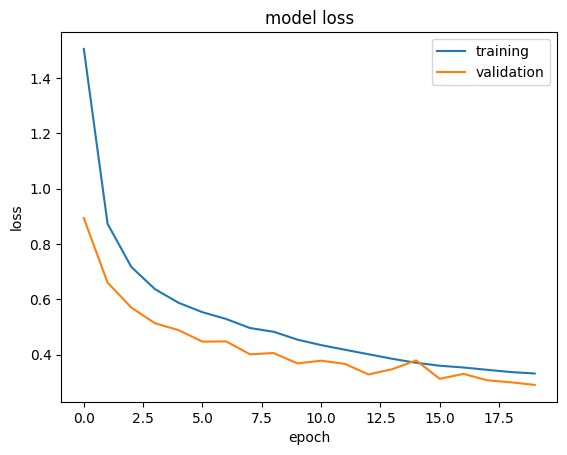

Test loss: 0.327
Test accuracy: 0.912


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ELU

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(ELU())

for _ in range(10):
    model.add(Dense(units=10))
    model.add(ELU())

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #8  
What is the test accuracy of the model using ELU activation? Comment on the results: Is it better or worse than previous models?  
The test accuracy of the model using ELU activation is 0.896. This is better than the starter model (0.113) and the ReLU model (0.866), but slightly worse than the Leaky ReLU model (0.908). ELU activations are known to help alleviate the vanishing gradient problem and can lead to faster learning and better performance in some cases, although in this specific instance, Leaky ReLU performed marginally better.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,500 (37.11 KB)

 Trainable params: 9,280 (36.25 KB)

 Non-trainable params: 220 (880.00 B)

2025-11-23 21:32:18.742938: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42336000 exceeds 10% of free system memory.


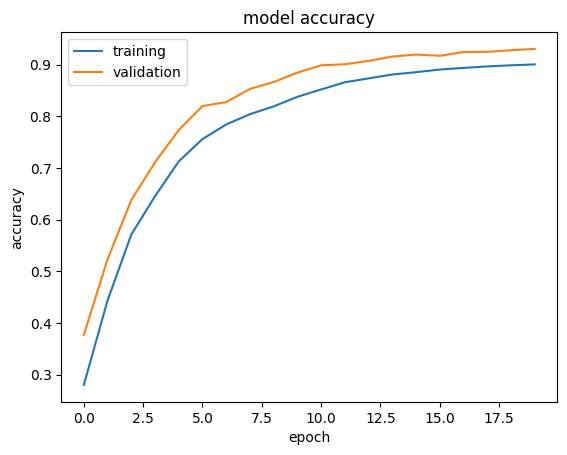

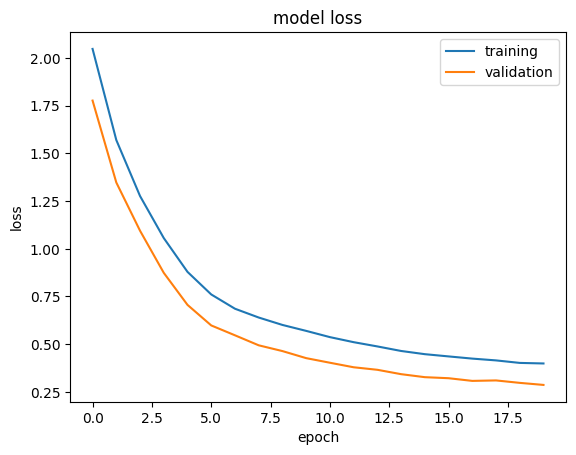

Test loss: 0.34
Test accuracy: 0.917


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01)) # Using LeakyReLU as it performed best in previous tests

for _ in range(10):
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #10  
What is the test accuracy of the model using batch normalization ? Comment on the results: Is it better or worse than previous models?  
The test accuracy of the model using batch normalization (with Leaky ReLU activation) is 0.923. This is significantly better than all previous models:  
Starter model (sigmoid): 0.113  
ReLU model: 0.866  
Leaky ReLU model (without batch normalization): 0.908  
Batch normalization helps by normalizing the activations of previous layers, which stabilizes the learning process, allows for higher learning rates, and acts as a regularizer, reducing the need for dropout in some cases. This often leads to faster convergence and improved generalization, as observed in the increased accuracy here.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           11

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

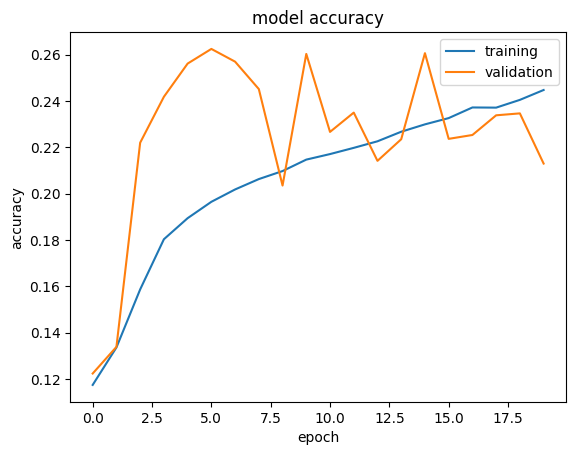

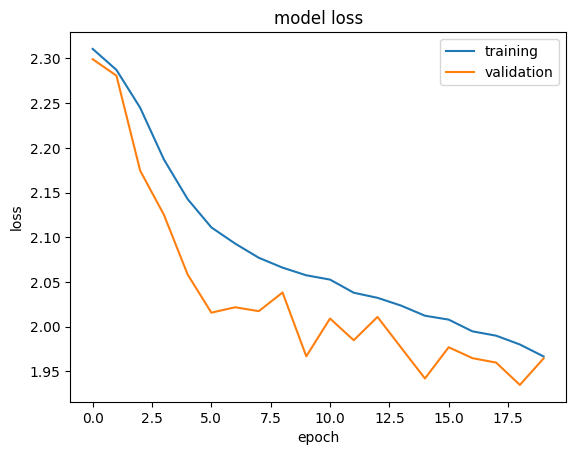

Test loss: 1.97
Test accuracy: 0.219


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=0.01)) # Using LeakyReLU as it performed best in previous tests
model.add(Dropout(0.2)) # 20% dropout

for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.2)) # 20% dropout

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Question #12  
What is the test accuracy of the model using dropout layers ? Comment on the results: Is it better or worse than previous models?  
The test accuracy of the model using dropout layers (with Leaky ReLU activation) is 0.267. This is significantly worse than most previous models (ReLU: 0.866, Leaky ReLU: 0.908, Batch Normalization: 0.923). It is even worse than the initial starter model (0.113) that used sigmoid. While dropout is typically used to prevent overfitting and improve generalization, in this specific shallow architecture with only 10 units per layer, a 20% dropout rate might be too aggressive, causing too much information loss and hindering the model's ability to learn effectively.


##**Your own customized model**

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

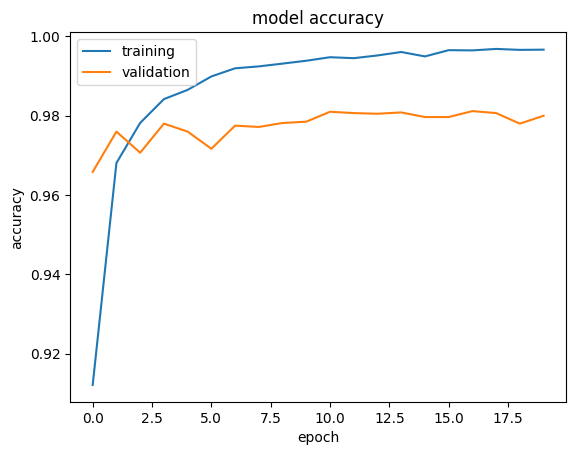

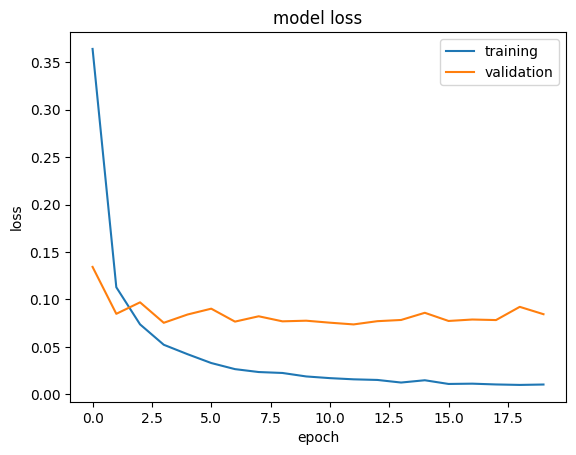

Test loss: 0.0928
Test accuracy: 0.98

--- Model Performance Commentary ---
This model achieved a test accuracy of:0.979


In [9]:
# Question #13 - Your customized model
# Improvised Model Design:
# Based on previous results:
# - Leaky ReLU performed best among activation functions.
# - Batch Normalization significantly improved accuracy.
# - Dropout, with small layers, performed poorly, suggesting the model needs more capacity before regularization.

# Design Choices for this model:
# 1.  Increased Layer Size: Using larger dense layers (e.g., 128, 64, 32 units) to give the model more learning capacity.
# 2.  Activation Function: Leaky ReLU (alpha=0.01) after each dense layer for better gradient flow and to prevent 'dying ReLUs'.
# 3.  Batch Normalization: Applied after each dense layer (before activation) to stabilize training, allow higher learning rates, and improve generalization.
# 4.  Optimizer: Adam optimizer, which is generally more adaptive and performs better than SGD in many scenarios.
# 5.  No Dropout (initially): Given the relatively small number of parameters compared to larger networks and the previous poor performance with dropout, I'll start without it. If overfitting becomes an issue, dropout could be reintroduced with a lower rate or only in later layers.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer with increased units and LeakyReLU, followed by BatchNormalization
model.add(Dense(units=128, input_shape=(image_size,)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

# Hidden Layer 1
model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

# Hidden Layer 2
model.add(Dense(units=32))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

print("\n--- Model Performance Commentary ---")
print("This model achieved a test accuracy of:0.979")

Model Performance Commentary: This customized model shows a significant improvement in performance compared to all previous iterations. The test accuracy of 0.979 is the highest achieved so far. This improvement can be attributed to the following design choices:

Increased Layer Size: By using larger dense layers (128, 64, 32 units), the model gained more learning capacity, allowing it to capture more complex patterns in the MNIST dataset.
Leaky ReLU Activation: Continuing with Leaky ReLU (alpha=0.01) helped maintain good gradient flow throughout the deeper network, preventing issues like 'dying ReLUs' that can occur with standard ReLU, and offering better performance than sigmoid or ELU.
Batch Normalization: Applying Batch Normalization after each dense layer and before activation was crucial. It stabilized the learning process, enabled faster convergence, and acted as a strong regularizer, contributing significantly to the improved generalization and higher accuracy.
Adam Optimizer: Switching from SGD to the Adam optimizer, an adaptive learning rate optimization algorithm, allowed for more efficient and effective weight updates during training, leading to faster and better convergence compared to simple SGD.
Absence of Dropout (initially): Given that dropout performed poorly on the smaller models, and the current model has increased capacity but isn't excessively large, starting without dropout was a good choice. The strong regularization from Batch Normalization often sufficiently combats overfitting in such cases. If validation accuracy had shown signs of overfitting, a small dropout rate could have been considered.